In [26]:
import pandas as pd

In [27]:
pip install graphviz

  Using cached https://files.pythonhosted.org/packages/f5/74/dbed754c0abd63768d3a7a7b472da35b08ac442cf87d73d5850a6f32391e/graphviz-0.13.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [28]:
#import the csv file
input_file="credit.csv"
credit=pd.read_csv(input_file)
credit.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [29]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

In [30]:
target=credit['Creditability']

In [31]:
#One issue with using the decision tree in Python is with categorical data. 
#There is a one additional step of pre-processing when you want to use 
#decision tree for categorical data in python.

#Check the output and see the difference.

target.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [32]:
#In order to develop the tree-based classification model 
#you need to split the data into training and test records. 
#Generate random numbers

import random
random.seed(12345)
indx = random.sample(range(0, 1000), 1000)
credit_rand = credit.iloc[indx]
target_rand = target.iloc[indx]



In [33]:
credit_rand.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
426,1,2,39,3,6,11760,2,4,2,3,...,3,4,32,3,1,1,3,1,2,1
750,1,2,36,3,0,2862,2,5,4,3,...,3,4,30,3,3,1,3,1,1,1
10,1,1,11,4,0,3905,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
839,0,4,12,2,0,1386,3,3,2,2,...,2,2,26,3,2,1,3,1,1,1
845,0,2,27,4,3,2520,3,3,4,3,...,2,2,23,3,2,2,2,1,1,1


In [8]:
#Run this command to compare the results
credit_rand.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [34]:
#Generally we use 75% to 90% for training and the rest for testing
credit_train = credit_rand.iloc[0:700]
credit_test = credit_rand.iloc[7000:1000]
target_train = target_rand.iloc[0:700]
target_test = target_rand.iloc[700:1000]

In [35]:
#A good Randomization should show close percentages between splits
target_train.value_counts()/700


1    0.691429
0    0.308571
Name: Creditability, dtype: float64

In [36]:
target_test.value_counts()/300


1    0.72
0    0.28
Name: Creditability, dtype: float64

In [37]:
#Method 2 of splitting the model
import numpy as np

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split

In [39]:
y = target

In [40]:
X = credit.drop(['Creditability'], axis=1)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=52)

In [42]:
#Train the model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [43]:
model = tree.DecisionTreeClassifier()


In [44]:
model = model.fit(X_train, y_train)


In [45]:
from IPython.display import SVG



In [46]:
from graphviz import Source
from IPython.display import display


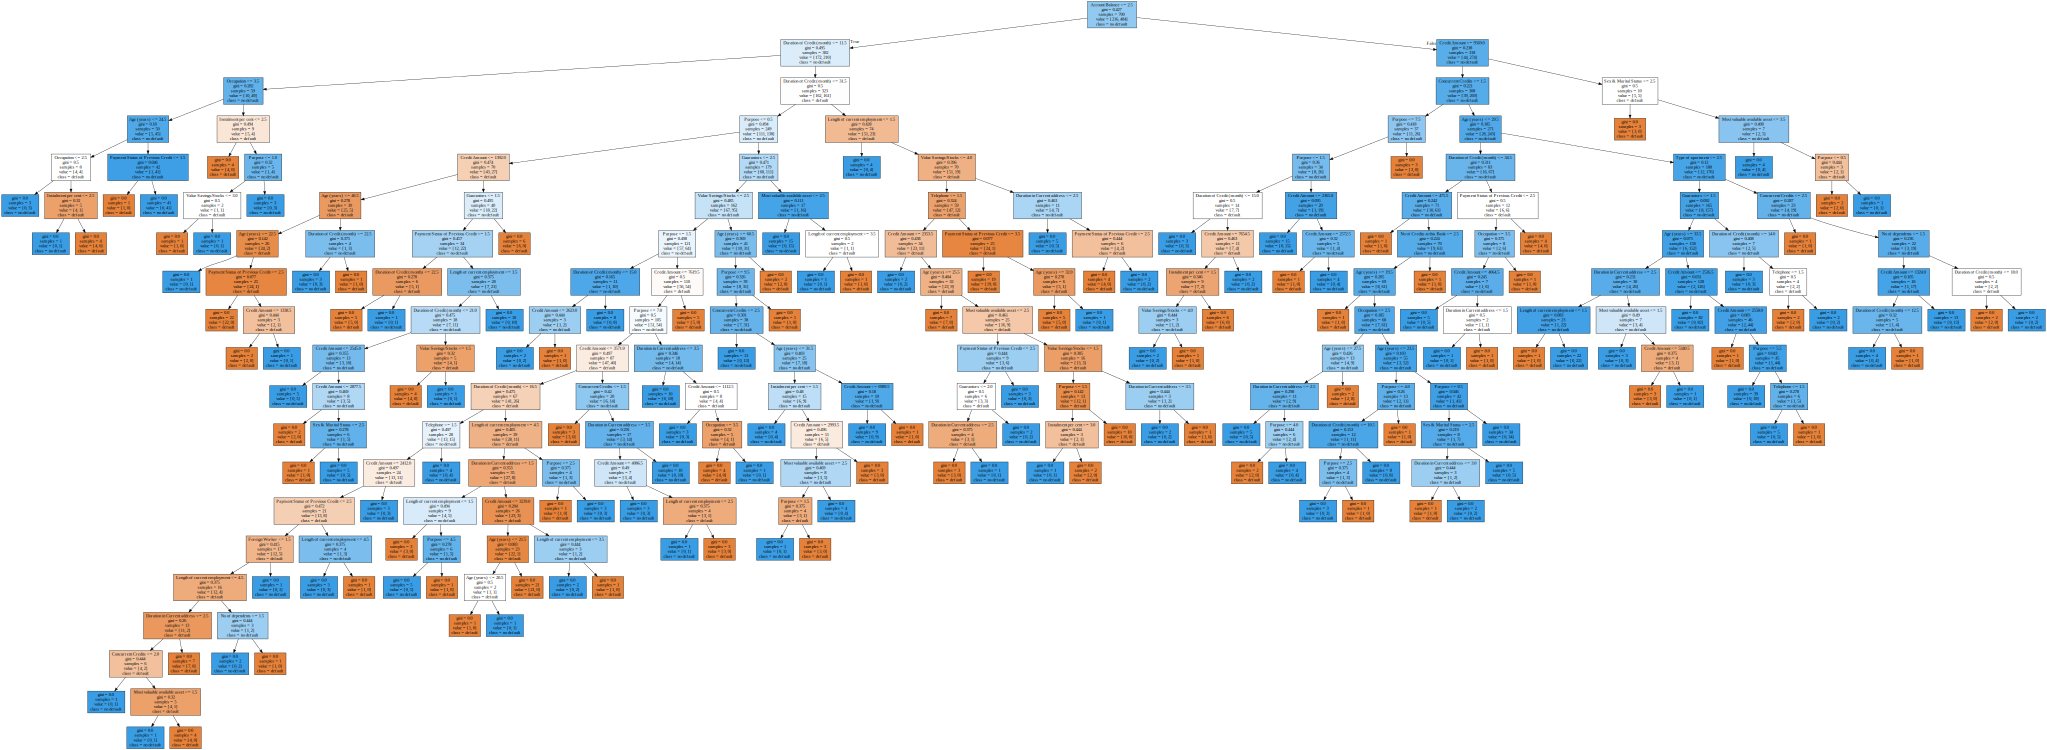

In [47]:
graph = Source(tree.export_graphviz(model, out_file=None
 , feature_names=X.columns, class_names=['default', 'no default'] 
 , filled = True))
display(SVG(graph.pipe(format='svg')))

In [48]:
#Train the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [49]:
y_predict = model.predict(X_test)


In [50]:
confusion_matrix(y_test, y_predict)


array([[ 40,  44],
       [ 52, 164]], dtype=int64)

In [51]:
accuracy_score(y_test, y_predict)*100


68.0

In [52]:
#Q1:If you see the accuracy 0f 100%, what does it mean? Does 
#this mean that we design a perfect model? This is some thing that 
#needs more discussion. Write a few sentences about accuracy of 100%. 
#Answer: If there is an accuracy of 100%, it could be a sign of overfitting.
#Overfitting is when a model fits the limited data too closely and thus, the 
#model cannot be used to additional data or predict future observations reliably.

In [53]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23458) 


In [54]:
clf = RandomForestClassifier() 
clf.fit(X_train, y_train) 


C:\Users\rothg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_predict = clf.predict(X_test) 


In [56]:
print(confusion_matrix(y_test, y_predict)) 


[[ 45  37]
 [ 48 170]]


In [57]:
print(accuracy_score(y_test, y_predict)*100) 


71.66666666666667


In [58]:
#Now, Change the random seed to 23458 and find the new accuracy of random forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23458)

In [59]:
clf = RandomForestClassifier() 
clf.fit(X_train, y_train) 

C:\Users\rothg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
y_predict = clf.predict(X_test) 


In [61]:
print(confusion_matrix(y_test, y_predict)) 


[[ 48  34]
 [ 39 179]]


In [62]:
print(accuracy_score(y_test, y_predict)*100) 


75.66666666666667


In [63]:
import pandas as pd 

feature_importances = pd.DataFrame(clf.feature_importances_,
index = X_train.columns,columns=['importance']).sort_values('importance',                                                                 
ascending=False)

feature_importances

,importance
Account Balance,0.127180
Credit Amount,0.126766
Duration of Credit (month),0.102360
Age (years),0.093916
Purpose,0.064570
Payment Status of Previous Credit,0.055764
Length of current employment,0.055340
Most valuable available asset,0.050695
Sex & Marital Status,0.042400
Value Savings/Stocks,0.041919


In [64]:
#Q2- What are the three most important features in this model. The three 
#most important features for the model are credit amount, account balance, and 
#duration of creadit(month).